In [55]:
from glob import glob as glob
import os
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
results_root="/storage/czw/btbench/outputs/btbench_popt_lite/"

In [42]:
ss_sm_paths = glob(os.path.join(results_root, "SS_SM", "*", "results.json"))

In [43]:
all_records = []
for path in ss_sm_paths:
    result_name = path.split("/")[-2]
    sub_name = "_".join(result_name.split("_")[1:3])
    sub_id = int(sub_name[len("sub_"):])
    trial_name = result_name.split("_")[3]
    trial_id = int(trial_name[len("trial"):])
    task_name = "_".join(result_name.split("_")[4:])
   
    with open(path, "r") as f:
        results = json.load(f)
        
        for k in range(len(results)):
            test_roc_auc = results[k]["test_roc_auc"]
        
            all_records.append({
                "subject_name": sub_name,
                "trial_name": trial_name,
                "subject_id": sub_id,
                "trial_id": trial_id,
                "fold": k,
                "task_name": task_name,
                "test_roc_auc": test_roc_auc

            })
results_df = pd.DataFrame.from_records(all_records)

In [44]:
results_df

,subject_name,trial_name,subject_id,trial_id,fold,task_name,test_roc_auc
0,sub_1,trial002,1,2,0,local_flow,0.510046
1,sub_1,trial002,1,2,1,local_flow,0.480079
2,sub_1,trial002,1,2,2,local_flow,0.494522
3,sub_1,trial002,1,2,3,local_flow,0.462614
4,sub_1,trial002,1,2,4,local_flow,0.498319
...,...,...,...,...,...,...,...
230,sub_1,trial001,1,1,0,speaker,0.459975
231,sub_1,trial001,1,1,1,speaker,0.538008
232,sub_1,trial001,1,1,2,speaker,0.254911
233,sub_1,trial001,1,1,3,speaker,0.519634


In [57]:
mean_df = results_df.groupby("task_name").mean("test_roc_auc").sort_values(by="test_roc_auc")

In [58]:
mean_df

,subject_id,trial_id,fold,test_roc_auc
task_name,,,,
speaker,1.000000,1.5,2.0,0.475975
local_flow_angle,1.333333,1.0,2.0,0.493876
word_head_pos,1.333333,1.0,2.0,0.494399
word_gap,1.333333,1.0,2.0,0.494709
global_flow_angle,1.333333,1.0,2.0,0.496196
word_part_speech,1.333333,1.0,2.0,0.500975
local_flow,1.333333,1.0,2.0,0.505597
gpt2_surprisal,1.333333,1.0,2.0,0.508844
word_length,1.333333,1.0,2.0,0.509986


(0.4, 0.8)

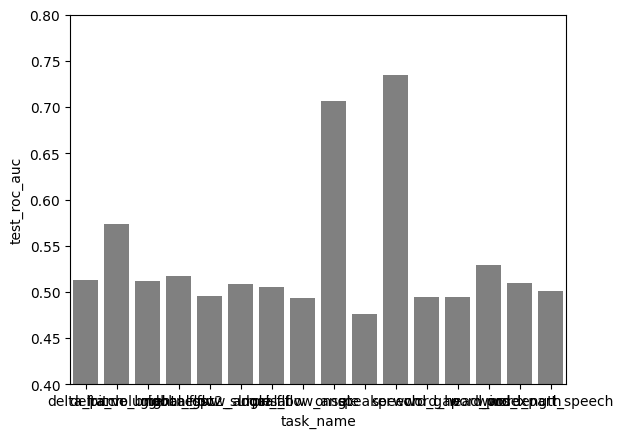

In [56]:
ax = sns.barplot(x=mean_df.index, y="test_roc_auc", data=mean_df, color='grey', )
plt.ylim(0.4,0.8)